<a href="https://colab.research.google.com/github/sonupp13/MACHINE-LEARNING-ALGORITHMS/blob/main/UNSUPERVISED%20ML/DS_DB_SCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers (1).csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


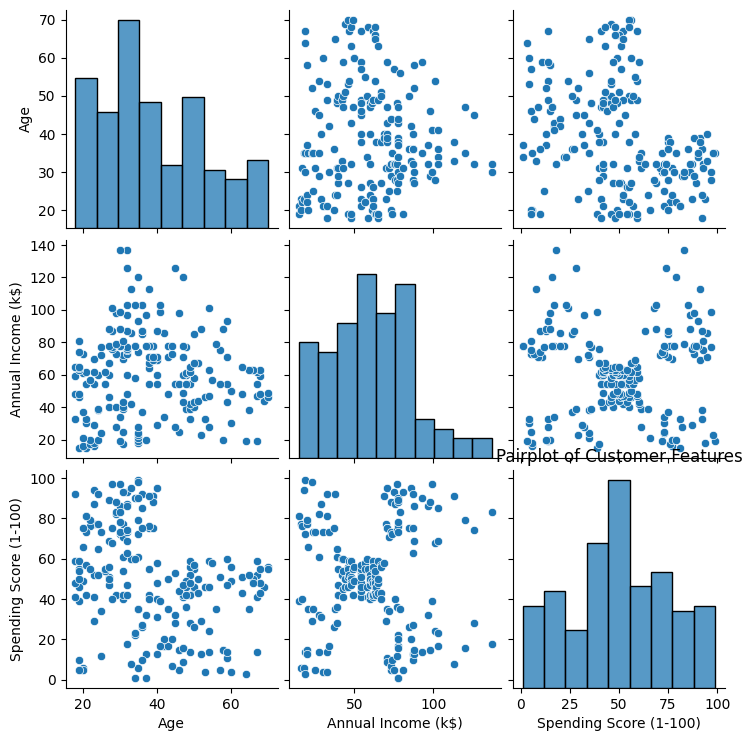

In [ ]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Pairplot of Customer Features')
plt.show()

In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3d to 2d

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X_scaled)

#eps= epsilon radius
#min_sample = min points in the circle

In [ ]:
 df['Cluster'] = y_pred
 df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


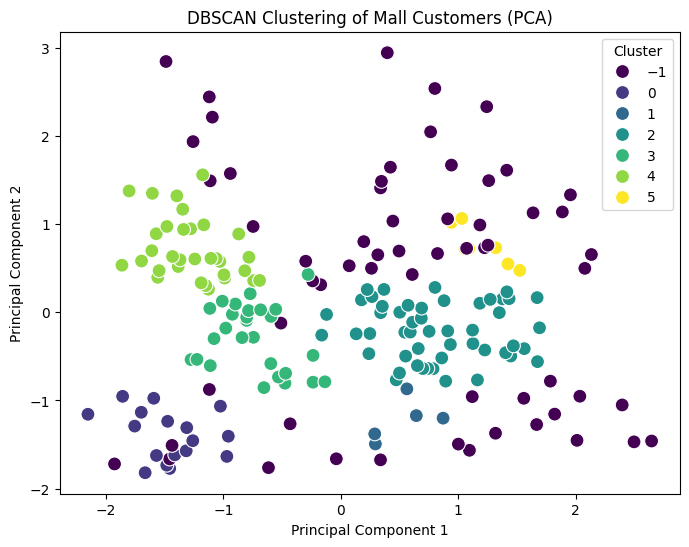

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'],palette='viridis', s=100)

plt.title('DBSCAN Clustering of Mall Customers (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()
